# Analyzing Star Wars Survey Data

For this project we will be analyzing data collected by the team at FiveThirtyEight. The data collected pertains to the Star Wars film franchise. The team was interested in determining if the rest of America agreed with them that the best film was "The Empire Strikes Back". The survey was conducted online and received 835 responses. The data contains the following information for each respondent:
- `RespondentID`: a unique, anonymous ID for the respondent
- `Gender`: the respondent's gender
- `Age`: the respondent's age
- `Household Income`: the respondent's household income
- `Education`: the education level of the respondent
- `Location (census region)`: the location of the respondent
- `Have you seen any of the 6 films in the Star Wars franchise?`: A yes or no response to the question
- `Do you consider yourself a fan of the Star Wars film franchise?`: A yes or no response to the question

There are other columns including columns which indicate the moviese the respondent has seen, as well as columns where the respondent ranks the movies from favorite (number 1) to least favoriate (number 6). In order to analyze this data set, we first need to clean it. This process will include removing rows where the respondent ID is a null value, converting some columns from string to bool, converting some columns to strings and renaming some columns. We will make these changes before starting the analysis.

In [1]:
#import libraries and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
pd.set_option("display.max_rows", 50, "display.max_columns", 50)
#preview the data
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Retur

In [2]:
#Remove any rows where the Respondent ID is a null value
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#Convert the first two questions to bool variables
yes_no = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


In [4]:
#Convert the variables asking if a respondent has seen each movie
#to boolean variables
movies = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies)

In [5]:
#Rename the columns for easier understanding
col_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply." : 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}
star_wars = star_wars.rename( columns = col_map)

In [6]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,True,True,True,True,True,True,5,4,6,3,2,1,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,True,True,True,True,True,True,True,True,4,5,6,2,3,1,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,Neither favorably nor unfavorably (neutral),Very unfavorably,Somewhat favorably,Unfamiliar (N/A),Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,00

In [7]:
#Convert the ranking columns from string to float and rename the columns
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
rankings = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}
star_wars = star_wars.rename(columns = rankings)

In [8]:
#Calculate the mean movie ranking 1 = favorite, 6 = least favorite
mean_rankings = star_wars[star_wars.columns[9:15]].mean()

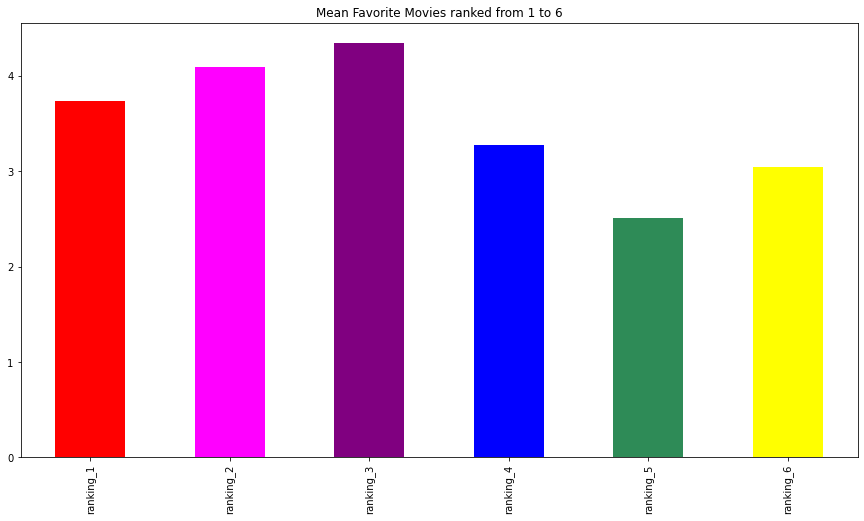

In [9]:
#Create a bar plot of the mean movie rankings
%matplotlib inline
mean_rankings.plot.bar(color = ('red', 'magenta', 'purple', 'blue', 'seagreen', 'yellow'),figsize=(15,8))
plt.title('Mean Favorite Movies ranked from 1 to 6')
plt.show()

## Favorite Movies

Up to this point, we have cleaned the data and renamed some of the columns. We have also calculated the mean favorite movie rankings and plotted the results above. For the mean favorite rankings, a lower score is better. It appears that the favorite movie is "Star Wars: Episode V The Empire Strikes Back". From the above plot, also note that episodes VI, V, and VI had the best rankings. This may be because those are the original three movies in the franchise. That may inspire a sense of nostalia in the respondents. Also, the more recent movies have a lot of special effects, which might take away from the plot for some people.

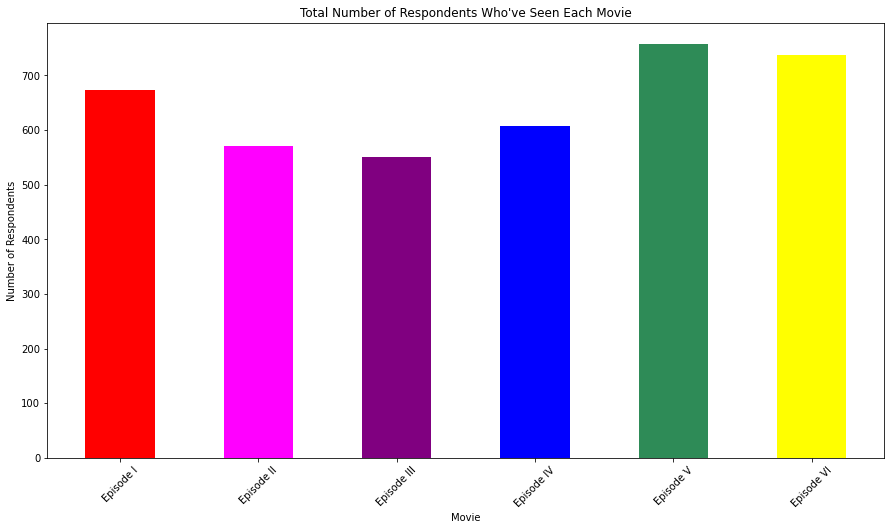

In [10]:
movie_counts = star_wars[star_wars.columns[3:9]].sum()
from numpy import arange
bar_positions = arange(6) + 0.75
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize = (15,8))
ax.bar(x = bar_positions, height = movie_counts.values, width = 0.5, color = ('red', 'magenta', 'purple', 'blue', 'seagreen', 'yellow'))
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Number of Respondents")
ax.set_title("Total Number of Respondents Who've Seen Each Movie")
plt.show()
#movie_counts.plot.bar(color = ('red', 'magenta', 'purple', 'blue', 'seagreen', 'yellow'))
#plt.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"])

The bar plot above shows how many respondents watched each of the Star Wars movies. The most watched movie was Episode V, which was also the favorite movie on average. The first movie released was Episode IV, which a good number of respondents watched. There is a significant increase in the number of respondents who watched Episode IV and Episode V. For the three most recently released movies there is a downward trend in viewership. There was a lot of attention paid to Episode I when it was released, but the reception was lukewarm, which possibly led to decreased viewership for the next two movies.

# Investigation Which Groups Affect Preference

### Gender

In [11]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

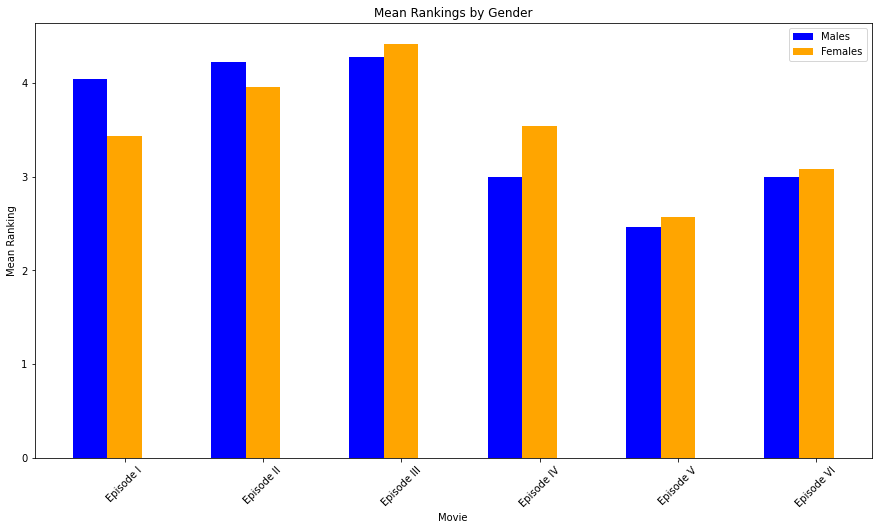

In [12]:
male_mean_rankings = males[males.columns[9:15]].mean()
female_mean_rankings = females[females.columns[9:15]].mean()
bar_positions = arange(6) + 0.25
tick_positions = list(range(1,7)) 
tick_positions = [x-.5 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = male_mean_rankings.values, width = 0.25, color ="blue", label = "Males")
ax.bar(x = bar_positions +.25, height = female_mean_rankings.values, width = 0.25, color = "orange", label = "Females")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Mean Ranking")
plt.legend()
ax.set_title("Mean Rankings by Gender")
plt.show()

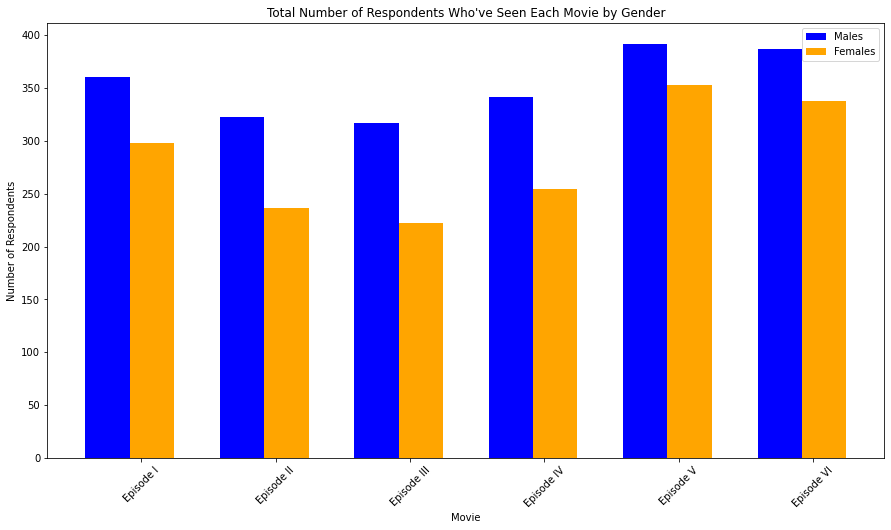

In [13]:
male_movie_counts = males[males.columns[3:9]].sum()
female_movie_counts = females[females.columns[3:9]].sum()
bar_positions = arange(6) + 0.5
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = male_movie_counts.values, width = 0.33, color = "blue", label = "Males")
ax.bar(x = bar_positions + .33, height = female_movie_counts.values, width = 0.33, color = "orange", label = "Females")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Number of Respondents")
ax.set_title("Total Number of Respondents Who've Seen Each Movie by Gender")
plt.legend()
plt.show()

There is not a big difference between the genders for movie rankings. The biggest disparity between opinions is for Episode I, with males ranking the movie higher. Again, in this context, the higher the ranking, the less the movie is liked by the respondent. The best ranked movie overall, Episode V, is also the best ranked movie by each gender. The general trend of movie rankings does not change drastically based gender.

### Star Wars Fans

In [14]:
sw_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

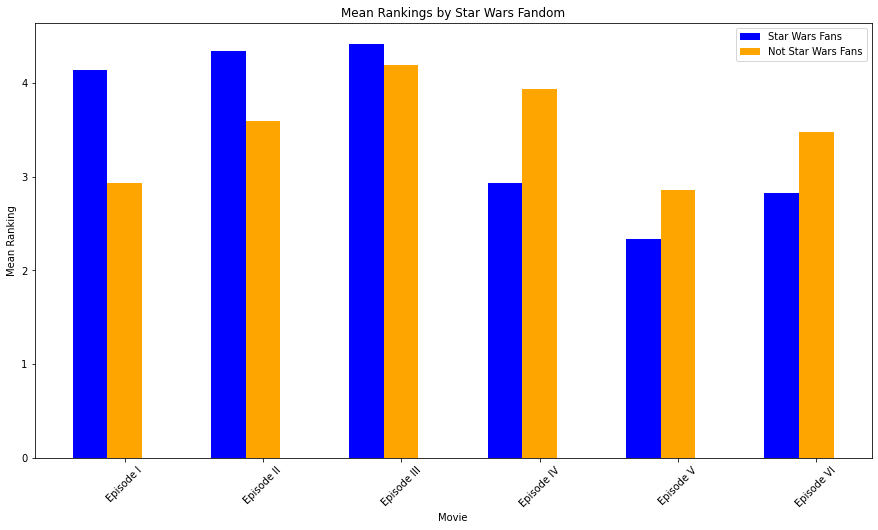

In [15]:
fans_rankings = sw_fans[sw_fans.columns[9:15]].mean()
not_fans_rankings = not_fans[not_fans.columns[9:15]].mean()
bar_positions = arange(6) + 0.25
tick_positions = list(range(1,7)) 
tick_positions = [x-.5 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = fans_rankings.values, width = 0.25, color ="blue", label = "Star Wars Fans")
ax.bar(x = bar_positions +.25, height = not_fans_rankings.values, width = 0.25, color = "orange", label = "Not Star Wars Fans")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Mean Ranking")
plt.legend()
ax.set_title("Mean Rankings by Star Wars Fandom")
plt.show()

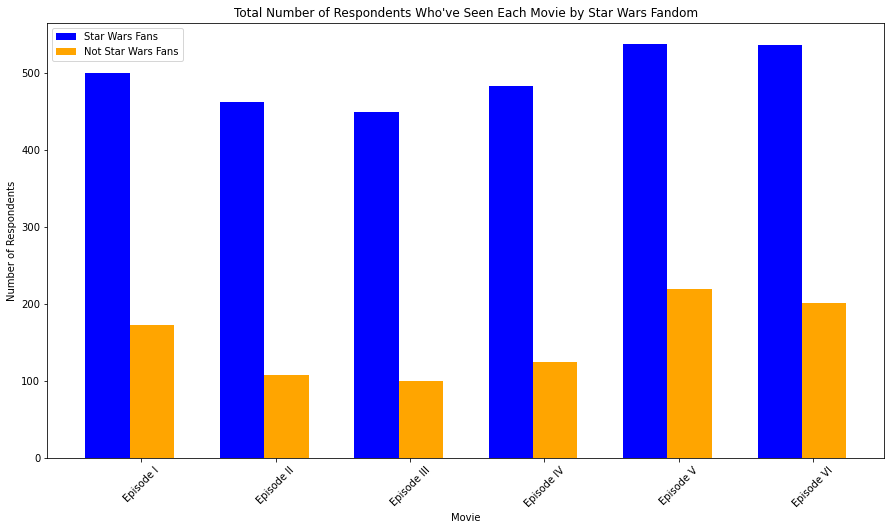

In [16]:
fans_movie_counts = sw_fans[sw_fans.columns[3:9]].sum()
not_movie_counts = not_fans[not_fans.columns[3:9]].sum()
bar_positions = arange(6) + 0.5
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = fans_movie_counts.values, width = 0.33, color = "blue", label = "Star Wars Fans")
ax.bar(x = bar_positions + .33, height = not_movie_counts.values, width = 0.33, color = "orange", label = "Not Star Wars Fans")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Number of Respondents")
ax.set_title("Total Number of Respondents Who've Seen Each Movie by Star Wars Fandom")
plt.legend(loc = "best")
plt.show()

For this analysis, we split the data into two groups. The first group contained data for respondents who consider themselves Star Wars fans, and the second group consists of individuals who do not consider themselves Star Wars fans. From the plot of mean rankings, we can see there is a difference between the two groups for the rankings of the movies. For Episodes I, II, and III, people who don't consider themselves fans tend to view these movies more favorably. For Episodes IV, V, and VI, the opposite is true. This is perhaps because people who view themselves as "True Fans" are more dedicated to the three movies initially released. 

Next, we look at the number of respondents who watched each movie. Unsurprisingly, there are more respondents who consider themselves to be fans of the franchise who watched each movie. However, the pattern across movies is the essentially the same for each group. Thus, the proportion of fans and the proportion of not fans change by about the same amount between movies. Then the difference in movie rankings between groups is based on opinion, not viewership.

### Star Trek Fans

In [17]:
trekies = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
not_treks = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

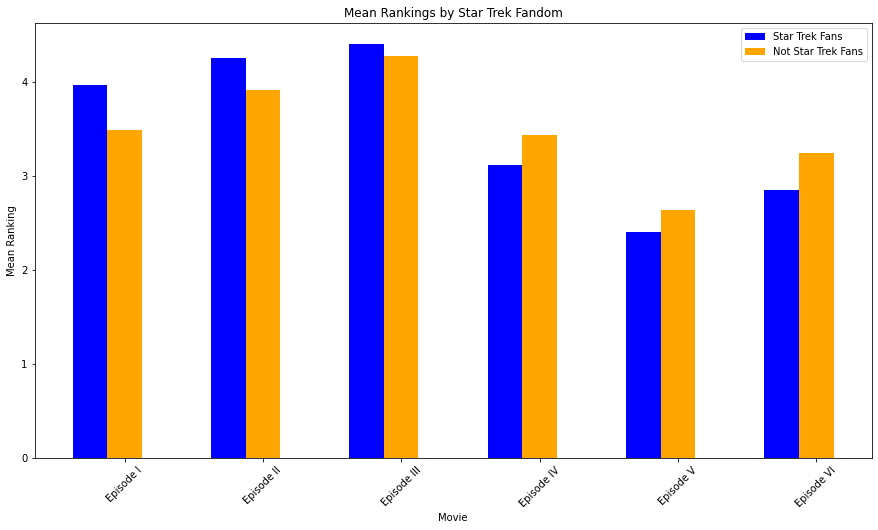

In [18]:
trekie_rankings = trekies[trekies.columns[9:15]].mean()
not_treks_rankings = not_treks[not_treks.columns[9:15]].mean()
bar_positions = arange(6) + 0.25
tick_positions = list(range(1,7)) 
tick_positions = [x-.5 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = trekie_rankings.values, width = 0.25, color ="blue", label = "Star Trek Fans")
ax.bar(x = bar_positions +.25, height = not_treks_rankings.values, width = 0.25, color = "orange", label = "Not Star Trek Fans")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Mean Ranking")
plt.legend()
ax.set_title("Mean Rankings by Star Trek Fandom")
plt.show()

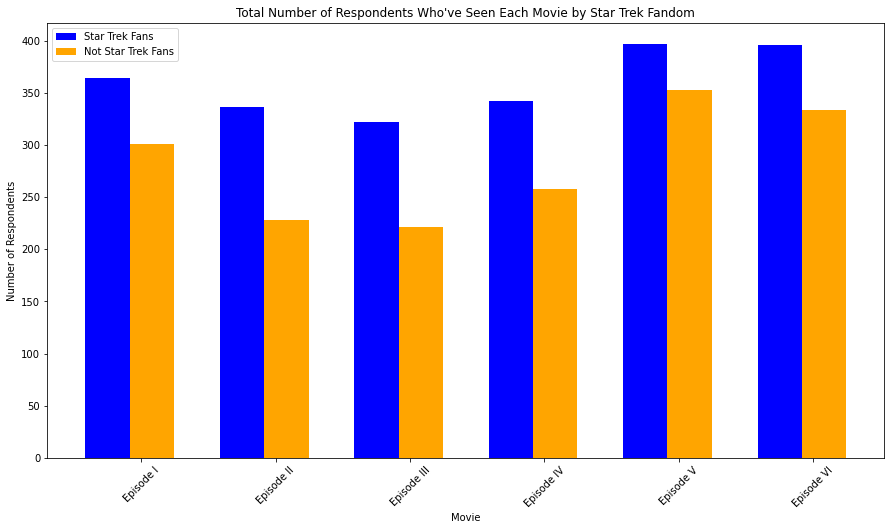

In [19]:
trek_movie_counts = trekies[trekies.columns[3:9]].sum()
nottreks_movie_counts = not_treks[not_treks.columns[3:9]].sum()
bar_positions = arange(6) + 0.5
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = trek_movie_counts.values, width = 0.33, color = "blue", label = "Star Trek Fans")
ax.bar(x = bar_positions + .33, height = nottreks_movie_counts.values, width = 0.33, color = "orange", label = "Not Star Trek Fans")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Number of Respondents")
ax.set_title("Total Number of Respondents Who've Seen Each Movie by Star Trek Fandom")
plt.legend(loc = "best")
plt.show()

For the next part of the analysis, we split the data into two groups based on respondents answer to the question `Do you consider yourself to be a fan of the Star Trek franchise?`. The first group is composed of people who answered yes to the question, the second group is individuals who said no. Star Trek fans tended to rank Episodes IV, V, and VI more favorably than individuals who do not consider themselves Star Trek fans. For Episodes I, II, and III the opposite is true. 

When looking at the overall number of respondents who viewed each movie, more Star Trek fans watched each movie than not Star Trek fans. However, the overall pattern between the two groups is the same.

# Who Shot First

One of the questions the team at FiveThirtyEight asked in the survey was `Which character shot first?`. In order to understand this question, one needs backround knowledge about the movies. Essentially, there was a change made in the movie that some fans disagree with. More information can be found [here](https://en.wikipedia.org/wiki/Han_shot_first). Without this backround information, this question is difficult to answer. In fact, of the 828 individuals who answered this question, 306 responded "I don't understand this question". Unsurpisingly there is a large difference between groups if we look at Star Wars fans and not Star Wars fans who do not under stand this question. Of Star Wars fans, 23% did not understand this question. For the group composed of individuals who do not consider themselves Star Wars fans, 64% do not understand this question. Perhaps the team included this question to provide some amusement to the huge fans.

In [20]:
star_wars["Which character shot first?"].value_counts(dropna = False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [21]:
print("Star Wars Fans Respones: \n",sw_fans["Which character shot first?"].value_counts(dropna = False))
print("Not Star Wars Fans Respones:", "\n",not_fans["Which character shot first?"].value_counts(dropna = False))

Star Wars Fans Respones: 
 Han                                 268
Greedo                              151
I don't understand this question    126
NaN                                   7
Name: Which character shot first?, dtype: int64
Not Star Wars Fans Respones: 
 I don't understand this question    180
Han                                  57
Greedo                               46
NaN                                   1
Name: Which character shot first?, dtype: int64


# Impact of Education on Star Wars Fandom

Next, we will investigate the impact education level has on the different aspects of Star Wars ratings. The respondents fell into five categories for education: `Some college or Associate degree`, `Bachelor degree`, `Graduate degree`, `High school degree`, and `Less than high school degree`. The distribution of education is shown below. Note that there are only 7 respondents with less than a high school degree. This means we can draw no real conclusions to the larger population of individuals with less than a high school degree.

In [22]:
as_deg = star_wars[star_wars["Education"] == "Some college or Associate degree"]
bach_deg = star_wars[star_wars["Education"] == "Bachelor degree"]
grad_deg = star_wars[star_wars["Education"] == "Graduate degree"]
hs_deg = star_wars[star_wars["Education"] == "High school degree"]
no_deg = star_wars[star_wars["Education"] == "Less than high school degree"]
as_deg_rank = as_deg[as_deg.columns[9:15]].mean()
bach_deg_rank = bach_deg[bach_deg.columns[9:15]].mean()
grad_deg_rank = grad_deg[grad_deg.columns[9:15]].mean()
hs_deg_rank = hs_deg[hs_deg.columns[9:15]].mean()
no_deg_rank = no_deg[no_deg.columns[9:15]].mean()
as_count = as_deg[as_deg.columns[3:9]].sum()
bs_count = bach_deg[bach_deg.columns[3:9]].sum()
gd_count = grad_deg[grad_deg.columns[3:9]].sum()
hs_count = hs_deg[hs_deg.columns[3:9]].sum()
no_count = no_deg[no_deg.columns[3:9]].sum()
print(star_wars["Education"].value_counts())

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64


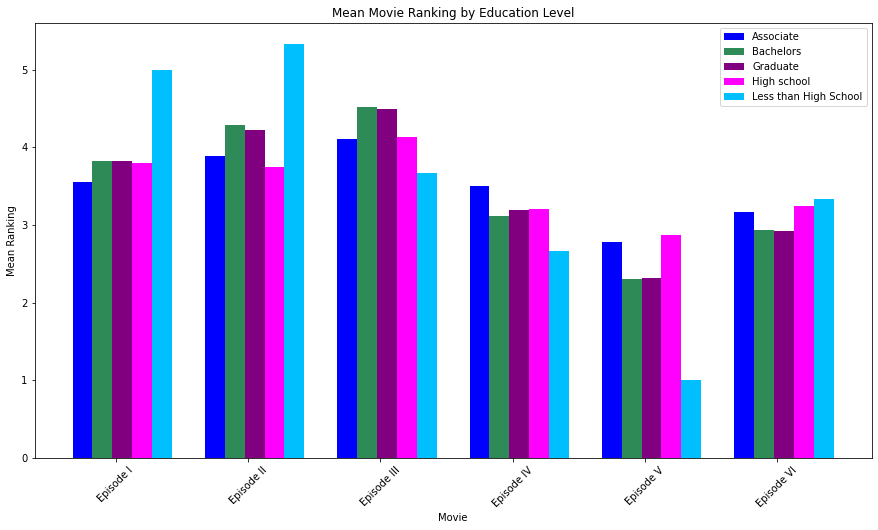

In [23]:
bar_positions = arange(6) + 0.5
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = as_deg_rank.values, width = 0.15, color = "blue", label = "Associate")
ax.bar(x = bar_positions + .15, height = bach_deg_rank.values, width = 0.15, color = "seagreen", label = "Bachelors")
ax.bar(x = bar_positions + 2*.15, height = grad_deg_rank.values, width = 0.15, color = "purple", label = "Graduate")
ax.bar(x = bar_positions + 3*.15, height = hs_deg_rank.values, width = 0.15, color = "magenta", label = "High school")
ax.bar(x = bar_positions + 4*.15, height = no_deg_rank.values, width = 0.15, color = "deepskyblue", label = "Less than High School")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Mean Ranking")
ax.set_title("Mean Movie Ranking by Education Level")
plt.legend(loc = "best")
plt.show()

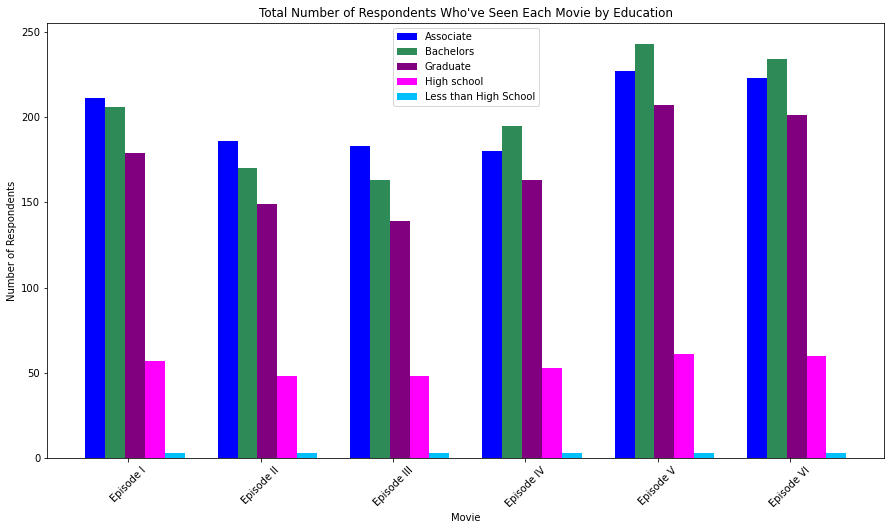

In [24]:
bar_positions = arange(6) + 0.5
tick_positions = list(range(1,7)) 
tick_positions = [x-.25 for x in tick_positions]
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x = bar_positions, height = as_count.values, width = 0.15, color = "blue", label = "Associate")
ax.bar(x = bar_positions + .15, height = bs_count.values, width = 0.15, color = "seagreen", label = "Bachelors")
ax.bar(x = bar_positions + 2*.15, height = gd_count.values, width = 0.15, color = "purple", label = "Graduate")
ax.bar(x = bar_positions + 3*.15, height = hs_count.values, width = 0.15, color = "magenta", label = "High school")
ax.bar(x = bar_positions + 4*.15, height = no_count.values, width = 0.15, color = "deepskyblue", label = "Less than High School")
ax.set_xticks(tick_positions)
ax.set_xticklabels(["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"], rotation = 45)
ax.set_xlabel("Movie")
ax.set_ylabel("Number of Respondents")
ax.set_title("Total Number of Respondents Who've Seen Each Movie by Education")
plt.legend(loc = "best")
plt.show()

From the above charts, first note the `Less than high schoool degree` category tends to stand apart. This is due to the low level of respondents who fall into that group. If we look at the plot of the mean movie ranking by education, we can see that the rankings for Episodes I, II, and III look similar between groups, excepting the less than high school group. The pattern between groups is also similar for Episodes IV, V, and VI. Individuals with a Bachelor degree or graduate degree seem to give Episode IV a high ranking relative to other groups.

# Character Favorability

Next we will look into the favorability ratings of popular Star Wars characters. Respondents were asked to rank some specific characters as "Very favorably", "Somewhat favorably", "Neither favorably nor unfavorably (neutral)", "Unfamiliar (N/A)", "Somewhat unfavorably", or "Very unfavorably". We will look at which characters are most frequently rated as very favorably.

In [25]:
new_map = {
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." : "Han Solo",
    "Unnamed: 16" : "Luke Skywalker",
    "Unnamed: 17" : "Princess Leia Organa",
    "Unnamed: 18" : "Anakin Skywalker",
    "Unnamed: 19" : "Obi Wan Kenobi",
    "Unnamed: 20" : "Emperor Palpatine",
    "Unnamed: 21" : "Darth Vader",
    "Unnamed: 22" : "Lando Calrissian",
    "Unnamed: 23" : "Boba Fett",
    "Unnamed: 24" : "C-3P0",
    "Unnamed: 25" : "R2 D2",
    "Unnamed: 26" : "Jar Jar Binks",
    "Unnamed: 27" : "Padme Amidala",
    "Unnamed: 28" : "Yoda"
}
star_wars = star_wars.rename(columns = new_map)

In [26]:
this = list(star_wars.columns[15:29])
temp = {}
for t in this:
    print("------------------------------------------------------- \n")
    print("Breakdown for", t, ": \n") 
    print(star_wars[t].value_counts())
    print("\n")
    temp[t] = (star_wars[t] == "Very favorably").sum()

------------------------------------------------------- 

Breakdown for Han Solo : 

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64


------------------------------------------------------- 

Breakdown for Luke Skywalker : 

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64


------------------------------------------------------- 

Breakdown for Princess Leia Organa : 

Very favorably                                 

In [28]:
keys = list(temp.keys())
vals = list(temp.values())

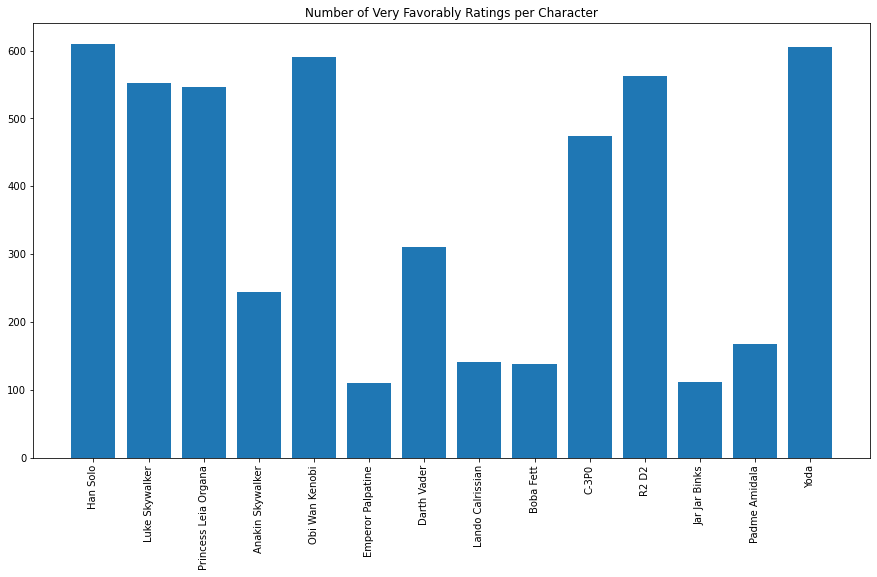

In [29]:
new = pd.DataFrame(vals, keys)
ax = plt.subplots(figsize=(15,8))
plt.bar(keys, vals)
plt.xticks(rotation='vertical')
plt.title("Number of Very Favorably Ratings per Character")
plt.show()

In [30]:
new = new.rename(columns = {0 : "Number of Very Favorably Ratings"})

In [31]:
new

,Number of Very Favorably Ratings
Han Solo,610
Luke Skywalker,552
Princess Leia Organa,547
Anakin Skywalker,245
Obi Wan Kenobi,591
Emperor Palpatine,110
Darth Vader,310
Lando Calrissian,142
Boba Fett,138
C-3P0,474


The character with the most `Very Favorably` ratings is Han Solo with a count of 610. Emperor Palpatine has the fewest `Very Favorably` ratings. The five characters with the most `Very Favorably` ratings are characters who feature prominently in Episodes IV, V, and VI. This is in line with our previous findings, specifically that those movies had the best average ratings. Notably, Darth Vader, who is the physical embodiment of evil, has a middling number of `Very Favorably` ratings with 310.  

# Conclusions

Overall, most people tend to rate Episode V as their favorite Star Wars movie. In general, most people feel that Episodes IV, V, and VI are better than Episodes I, II, and III. If we look at the difference between the preferences of Star Wars fans and not Star Wars fans, Episode V receives the highest ranking for both groups. However, Episode V barely beats out Episode I among people who do not consider themselves Star Wars fans. For the group consisting of fans, Episode V is the average favorite by a much larger margin. Also, there does not seem to be a significant difference in movie rankings between the genders. The overall trend observed also is seen when we split the data into groups based on education level. In other words, excluding the group of people without a high school degree, all groups ranked Episodes IV, V, and VI better than Episodes I, II, and III. Finally, most of the characters who received a high frequency of `Very Favorably` ratings are characters featured in Episodes IV, V, and VI. This shows that sometimes the originals can't be beat.